In [8]:
import pandas as pd
import numpy as np

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = pd.read_csv("/content/drive/MyDrive/AI/trum_tweet_sentiment_analysis.csv", encoding="ISO-8859-1")
data.head()

,text,Sentiment
0,RT @JohnLeguizamo: #trump not draining swamp b...,0
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,0
2,Trump protests: LGBTQ rally in New York https:...,1
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",0
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,0


## Helper Function for Text Cleaning:

Implement a Helper Function as per Text Preprocessing Notebook and Complete the following pipeline.

In [16]:
data_cleaning = data["text"].dropna()

In [17]:
data_cleaning[0]

'RT @JohnLeguizamo: #trump not draining swamp but our taxpayer dollars on his trips to advertise his properties! @realDonaldTrumpÂ\x85 https://t.co/gFBvUkMX9z'

In [23]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
custom_stopwords = ['@', 'RT']
stop_words.update(custom_stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
import re
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


In [27]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Build a Text Cleaning Pipeline

In [19]:
def text_cleaning_pipeline(dataset, rule = "lemmatize"):
  """
  This...
  """
  # Convert the input to small/lower order.
  data = dataset.lower()
  # Remove URLs
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  data = url_pattern.sub(r'', data)
  # Remove emojis
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                          u"\U0001F680-\U0001F6FF"  # transport & map symbols
                          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                          u"\U00002702-\U000027B0"
                          u"\U000024C2-\U0001F251"
                          "]+", flags=re.UNICODE)
  data = emoji_pattern.sub(r' ', data)
  # Remove all other unwanted characters.
  # remove user mentions
  data = re.sub("@[A-Za-z0-9_]+"," ", data)
  # remove hashtags
  data = re.sub("#[A-Za-z0-9_]+","", data)
  # remove punctuation
  data = re.sub("[^0-9A-Za-z ]", "" , data)
  # remove double spaces
  data = data.replace('  ',"")
  data = data.strip()
  # Create tokens.
  tokens = data.split()

  result_tokens = []
  for token in tokens:
    if token not in stop_words:
       result_tokens.append(token)
  tokens = result_tokens
  # Remove stopwords:
  if rule == "lemmatize":
    lemma_tokens = []
    wordnet = WordNetLemmatizer()
    lemmatized_tokens = [wordnet.lemmatize(token, pos = 'v') for token in tokens]
    tokens = lemmatized_tokens
  elif rule == "stem":
    porter = PorterStemmer()
    stemm_tokens = []
    for word in tokens:
      stemm_tokens.append(porter.stem(word))
    tokens = stemm_tokens
  else:
    print("Pick between lemmatize or stem")


  return " ".join(tokens)



In [28]:
sample = "Hello @gabe_flomo 👋🏾, I still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱"
print(text_cleaning_pipeline(sample))

hello still want us hit new sushi spot lmk youre free cuz cant go next weekend since ill swim


In [29]:
test = data["text"][0]
print(text_cleaning_pipeline(test))

rtnot drain swamp taxpayer dollars trip advertise properties


In [30]:
cleaned_tokens = data["text"].apply(lambda dataset: text_cleaning_pipeline(dataset))


In [31]:
cleaned_tokens[0]

'rtnot drain swamp taxpayer dollars trip advertise properties'

In [33]:
from sklearn.model_selection import train_test_split
# X = cleaned text data
X = cleaned_tokens

# y = sentiment labels
y = data["Sentiment"]

# Split into training and test sets (e.g. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


Train size: 1480098
Test size: 370025


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit on training data, transform both train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [36]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96    248563
           1       0.93      0.90      0.92    121462

    accuracy                           0.95    370025
   macro avg       0.94      0.94      0.94    370025
weighted avg       0.95      0.95      0.95    370025



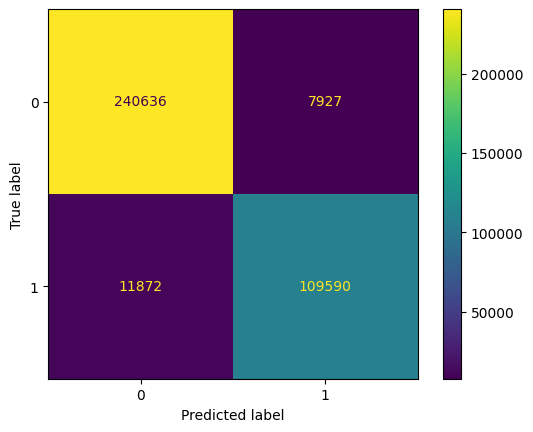

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


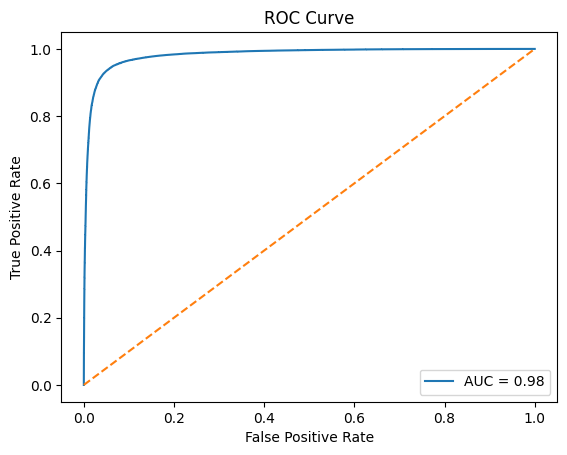

In [38]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### 📝 Instructions: Trump Tweet Sentiment Classification

1. **Load the Dataset**  
   Load the dataset named `"trump_tweet_sentiment_analysis.csv"` using `pandas`. Ensure the dataset contains at least two columns: `"text"` and `"label"`.

2. **Text Cleaning and Tokenization**  
   Apply a text preprocessing pipeline to the `"text"` column. This should include:
   - Lowercasing the text  
   - Removing URLs, mentions, punctuation, and special characters  
   - Removing stopwords  
   - Tokenization (optional: stemming or lemmatization)
   - "Complete the above function"

3. **Train-Test Split**  
   Split the cleaned and tokenized dataset into **training** and **testing** sets using `train_test_split` from `sklearn.model_selection`.

4. **TF-IDF Vectorization**  
   Import and use the `TfidfVectorizer` from `sklearn.feature_extraction.text` to transform the training and testing texts into numerical feature vectors.

5. **Model Training and Evaluation**  
   Import **Logistic Regression** (or any machine learning model of your choice) from `sklearn.linear_model`. Train it on the TF-IDF-embedded training data, then evaluate it using the test set.  
   - Print the **classification report** using `classification_report` from `sklearn.metrics`.
